In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import itertools
from scipy import stats
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mplcol
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
fig_dir = '../../paper/figs/source/freq'
ram_data_dir = '../../data/ram'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
ram_freq_dir = os.path.join(ram_data_dir, 'freq', 'voltage')
pyfr_freq_dir = os.path.join(pyfr_data_dir, 'freq', 'voltage')

In [5]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [6]:
r = 20

In [7]:

freqs = ['raw', 'delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
latex_freqs = ['All', "$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$\gamma_L$", "$\gamma_H$", 'BB']
freqnames = ['All', "$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$\gamma_L$", "$\gamma_H$", 'BB']


In [8]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i) 
    return(colors_rgba[:N, :3])

In [9]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

## For RAM

In [10]:
## load in all frequencies as longform and wideform :

long_form_freq_ram = pd.DataFrame()
wide_form_freq_ram = pd.DataFrame()

for e, freq in enumerate(freqs):
    
    freq_df = pd.read_csv(os.path.join(ram_freq_dir, freq + '.csv'), index_col=0)
    
    long_form_across = pd.DataFrame()
    long_form_across['Correlation'] = freq_df['across']
    long_form_across['Subject'] = 'a'
    long_form_across['Freq'] = latex_freqs[e]
    
    long_form_within = pd.DataFrame()
    long_form_within['Correlation'] = freq_df['within']
    long_form_within['Subject'] = 'w'
    long_form_within['Freq'] = latex_freqs[e]
    
    wide_form_temp = pd.DataFrame()
    wide_form_temp = freq_df[['across', 'within']]
    wide_form_temp['Freq'] = latex_freqs[e]

    
    long_form_freq_temp = long_form_across.append(long_form_within)
    
    long_form_freq_ram = long_form_freq_ram.append(long_form_freq_temp)
    
    wide_form_freq_ram = wide_form_freq_ram.append(wide_form_temp)
    

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## For PyFR:

In [11]:
## load in all frequencies as longform and wideform :

long_form_freq_pyfr = pd.DataFrame()
wide_form_freq_pyfr = pd.DataFrame()

for e, freq in enumerate(freqs):
    
    freq_df = pd.read_csv(os.path.join(pyfr_freq_dir, freq + '.csv'), index_col=0)
    
    long_form_across = pd.DataFrame()
    long_form_across['Correlation'] = freq_df['across']
    long_form_across['Subject'] = 'a'
    long_form_across['Freq'] = latex_freqs[e]
    
    long_form_within = pd.DataFrame()
    long_form_within['Correlation'] = freq_df['within']
    long_form_within['Subject'] = 'w'
    long_form_within['Freq'] = latex_freqs[e]
    
    wide_form_temp = pd.DataFrame()
    wide_form_temp = freq_df[['across', 'within']]
    wide_form_temp['Freq'] = latex_freqs[e]

    
    long_form_freq_temp = long_form_across.append(long_form_within)
    
    long_form_freq_pyfr = long_form_freq_pyfr.append(long_form_freq_temp)
    
    wide_form_freq_pyfr = wide_form_freq_pyfr.append(wide_form_temp)
    

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
freqnames = ['All', "$\delta$", r'$\theta$', r'$\alpha$', r'$\beta$', "$\gamma_L$", "$\gamma_H$", 'BB']

In [13]:
freqnames[1:]

['$\\delta$',
 '$\\theta$',
 '$\\alpha$',
 '$\\beta$',
 '$\\gamma_L$',
 '$\\gamma_H$',
 'BB']

## Make color palette:

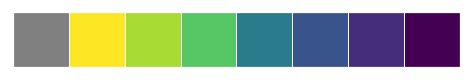

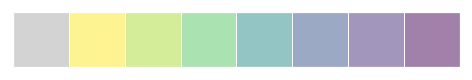

In [19]:

cmap = cm.viridis_r
offset = 28 # defines colormap offset from center
cmaplist = [cmap(i) for i in range(128-offset)] + [cmap(i) for i in range(128+offset,256)]
spec_spliced = mplcol.LinearSegmentedColormap.from_list('spec_spliced', cmaplist, 256)
## make color palette:
gray = matplotlib.colors.to_rgb('gray')
light_gray = matplotlib.colors.to_rgb('lightgray')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(freqnames[1:]))
rgba = cmap_discretize(spec_spliced, len(freqnames[1:]))
rgba_null = cmap_discretize(cmap_map(lambda x: x/2 + 0.5, spec_spliced),len(freqnames[1:])) 
rgba = sns.color_palette(np.vstack((gray, np.array(rgba))))
rgba_null = sns.color_palette(np.vstack((light_gray, np.array(rgba_null))))
sns.palplot(rgba)
sns.palplot(rgba_null)

In [22]:
rgba_null

[(0.8274509803921568, 0.8274509803921568, 0.8274509803921568),
 (0.996624, 0.9530784999999999, 0.571968),
 (0.8297032479021715, 0.9302594832518736, 0.6009658894677324),
 (0.6717536222222222, 0.8898994601307189, 0.6988484209150326),
 (0.5787993231249882, 0.7744119856860812, 0.7691029286910858),
 (0.6128607535947712, 0.6655521274509804, 0.7736768823529412),
 (0.6390736957430089, 0.5897701886588849, 0.7430671308665402),
 (0.633502, 0.502437, 0.6647075)]

## Jitter plots for pyfr

/Users/lucyowen/repos/supereeg_paper/code/notebooks/plot.py:812: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_temp['Correlation'] = df_temp['Correlation'] - offset
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


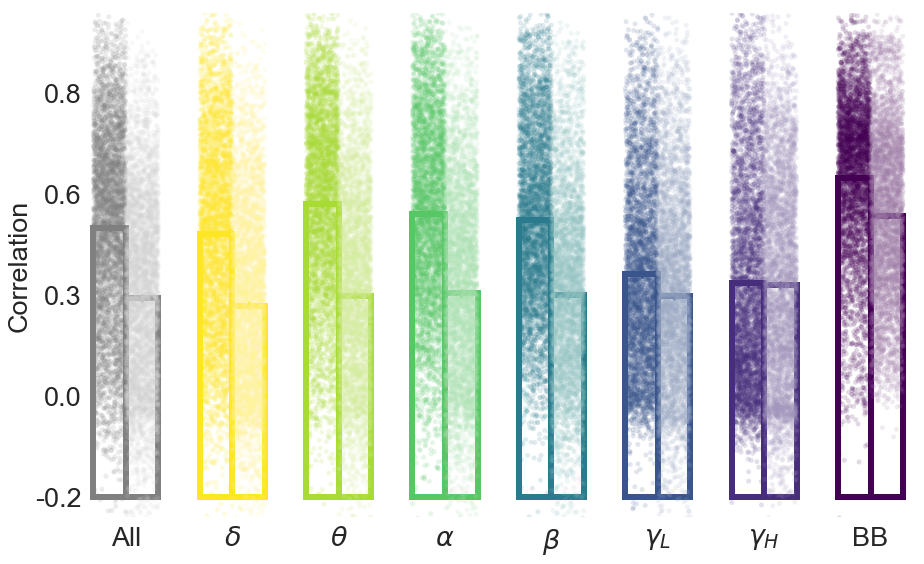

In [15]:
sns.set(style="white")
outfile = os.path.join(fig_dir, 'pyfr_freq_barplots.pdf')
plot.plot_split_barplot_colors(df=long_form_freq_pyfr, X='Freq', Y='Correlation', H='Subject', 
                        x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null, outfile=outfile)

## Jitter plots for RAM

/Users/lucyowen/repos/supereeg_paper/code/notebooks/plot.py:812: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_temp['Correlation'] = df_temp['Correlation'] - offset
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


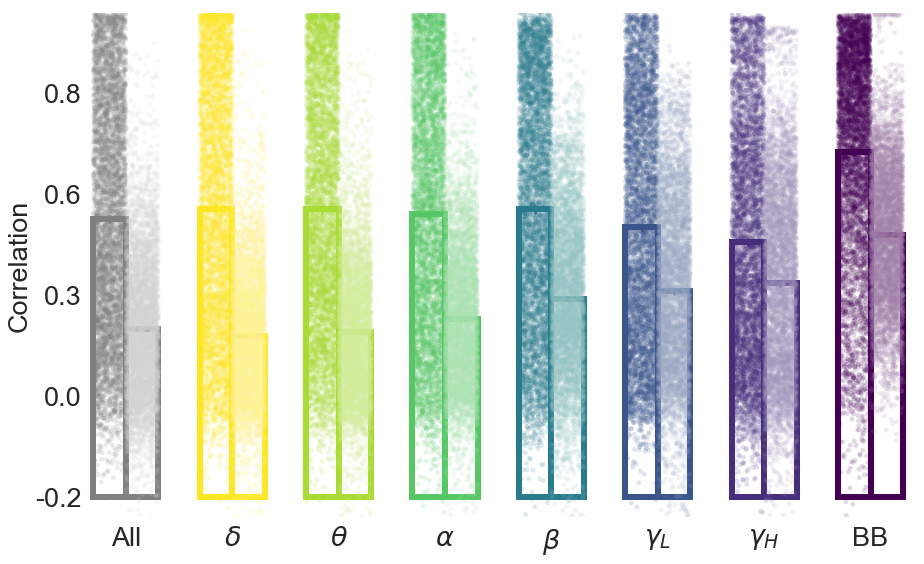

In [16]:
outfile = os.path.join(fig_dir, 'ram_freq_barplots.pdf')
plot.plot_split_barplot_colors(df=long_form_freq_ram, X='Freq', Y='Correlation', H='Subject', 
                        x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null, outfile=outfile)

## Plot stats heatmap

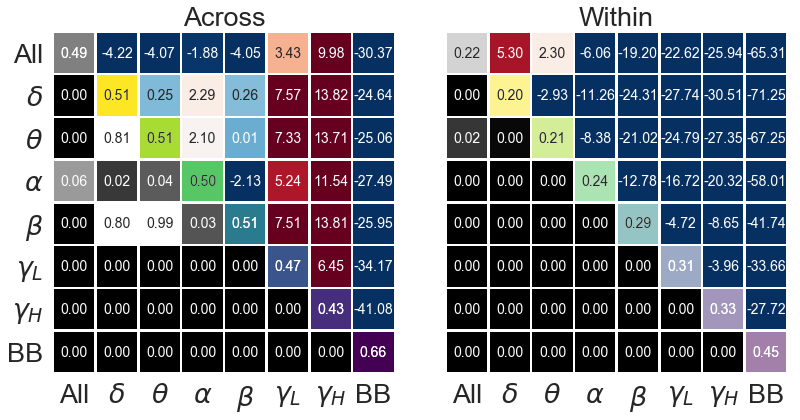

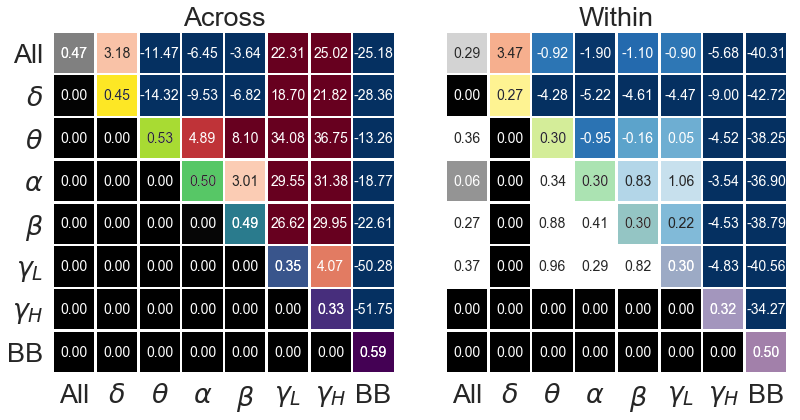

In [17]:
## This is just for the unevent values.  Once results are done and all the same number, remove the indexing 2000

freq_perms = list(range(8))
stat_dict = {}

sns.set(font_scale=3)

sub_list = ['a', 'w']
color_list = [rgba, rgba_null]
plt_title = ['Across', 'Within']

for i in ['ram', 'pyfr']:

    t_array = np.zeros((8, 8, 2))
    
    
    fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,13))
    
    
    for e, ax in enumerate(axn.flat):
        
        exp_df = eval('long_form_freq_' + i)

        parsed_pd = exp_df[exp_df['Subject']==sub_list[e]]

        for pair in list(itertools.combinations(freq_perms, r=2)):
            
            t = stats.ttest_rel(parsed_pd[parsed_pd['Freq']==freqnames[pair[0]]]['Correlation'], 
                                parsed_pd[parsed_pd['Freq']==freqnames[pair[1]]]['Correlation'])

            t_array[pair[0], pair[1], e] = t.statistic
            t_array[pair[1], pair[0], e] = t.pvalue
            
    
        
        data = t_array[:, :, e]
        df = pd.DataFrame(data, columns=freqnames,index = freqnames)

        labels = df
        labels = labels.round(2)
        labels = labels.replace(np.nan,' ', regex=True)

        
        for f in freq_perms:
            labels.iloc[f,f] = parsed_pd[parsed_pd['Freq']==freqnames[f]]['Correlation'].mean()
            
        mask = np.triu(np.ones(df.shape)).astype(np.bool)
        
        g = sns.heatmap(df, mask=mask, cmap='binary_r',annot=labels, annot_kws={"size": 14},cbar=False, fmt='.2f', square=True, linewidths=1.5, vmin=0, vmax=.1, ax=ax)
        
        mask = np.ones((8, 8))-mask
        g = sns.heatmap(df, mask=mask, cmap='RdBu_r',annot=labels, annot_kws={"size": 14},cbar=False, fmt='.2f', vmin=-2, vmax=6, linewidths=1.5, ax=ax)
        
        diag_palette = color_list[e]
        
        for f in freq_perms:
            full_sq = np.ones((8,8))
            full_sq[f,f] = 0
            g = sns.heatmap(df, mask=full_sq.astype(np.bool), cmap=sns.color_palette(np.atleast_2d(diag_palette[f])),annot=labels, annot_kws={"size": 14},cbar=False, fmt='.2f', vmin=0, vmax=1, linewidths=1.5, ax=ax)

        g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=27)
        g.set_yticklabels(g.get_xticklabels(), rotation=0, fontsize=27) 
        g.set_title(plt_title[e], fontsize=27)
        #g.set_ylabel(i.capitalize(), fontsize=50)

    outfile = os.path.join(fig_dir, 'stats_heatmaps_' + i + '.pdf')
    plt.tight_layout()
    plt.savefig(outfile)
    plt.show()

In [18]:
# # split violin plots:

# plot.plot_split_violin_colors(df=long_form_freq_ram, X='Freq', Y='Correlation', H='Subject', 
#                          x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null)